In [1]:
library(ggplot2)
library(data.table)


In [2]:
df = fread('Economist_Assignment_Data.csv', drop = 1)

In [3]:
head(df)

Country,HDI.Rank,HDI,CPI,Region
Afghanistan,172,0.398,1.5,Asia Pacific
Albania,70,0.739,3.1,East EU Cemt Asia
Algeria,96,0.698,2.9,MENA
Angola,148,0.486,2.0,SSA
Argentina,45,0.797,3.0,Americas
Armenia,86,0.716,2.6,East EU Cemt Asia


**Use ggplot() + geom_point() to create a scatter plot object called pl. You will need to specify x=CPI and y=HDI and color=Region as aesthetics **


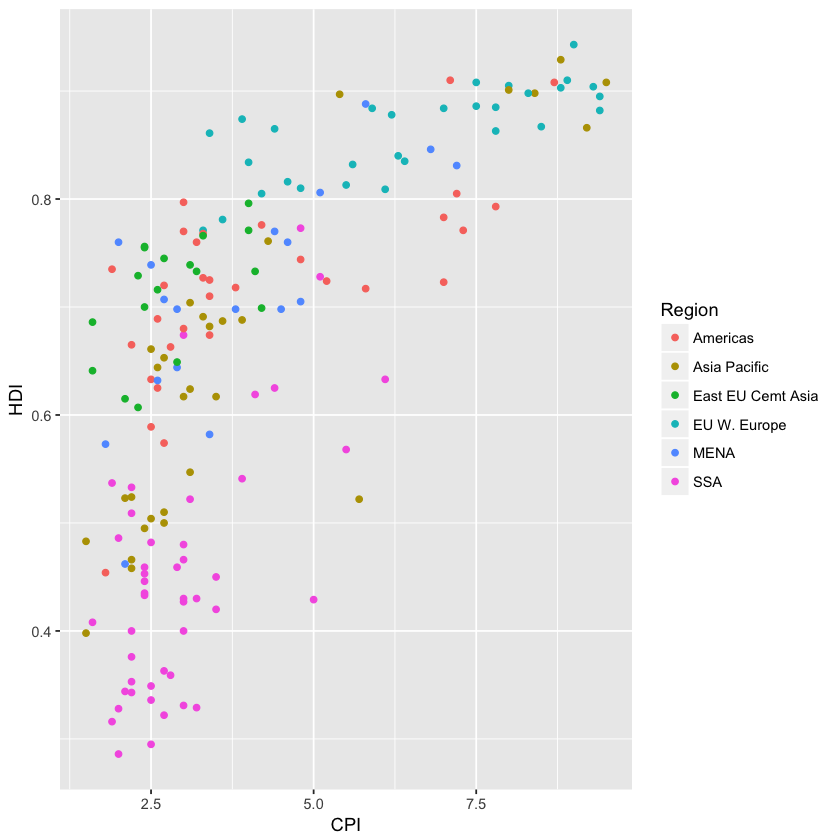

In [8]:
pl = ggplot(df, aes(x=CPI, y = HDI, color = Region)) + geom_point()
pl

__Change the points to be larger empty circles. (You'll have to go back and add arguments to geom_point() and reassign it to pl.) You'll need to figure out what shape= and size=__

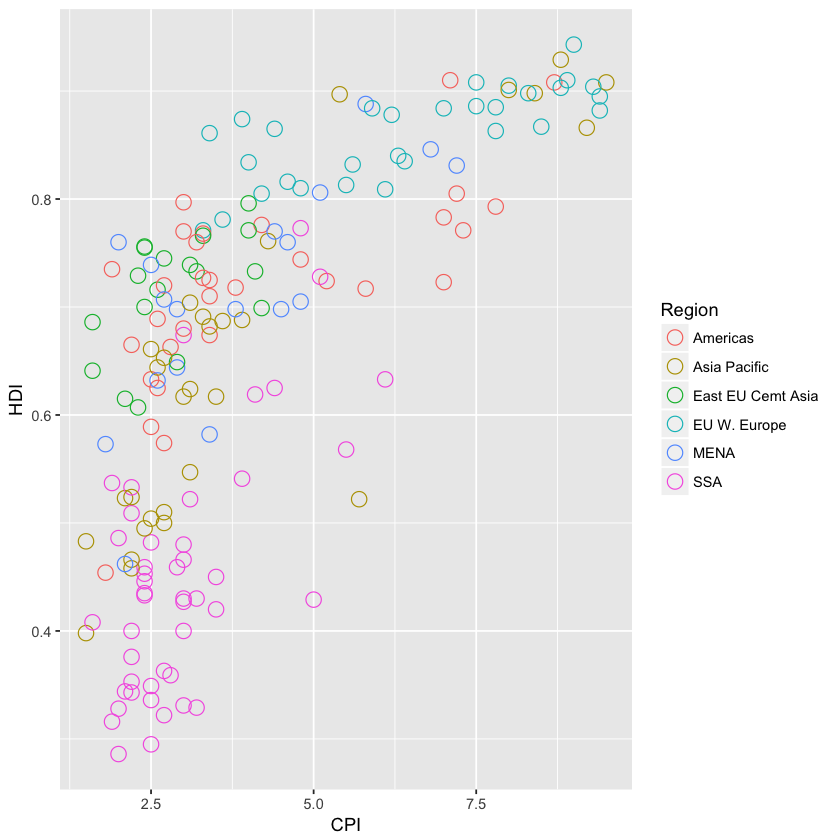

In [12]:
pl = ggplot(df, aes(x=CPI, y = HDI, color = Region)) + geom_point(size = 4, shape = 1)
pl

__Add geom_smooth(aes(group=1)) to add a trend line__

`geom_smooth()` using method = 'loess'


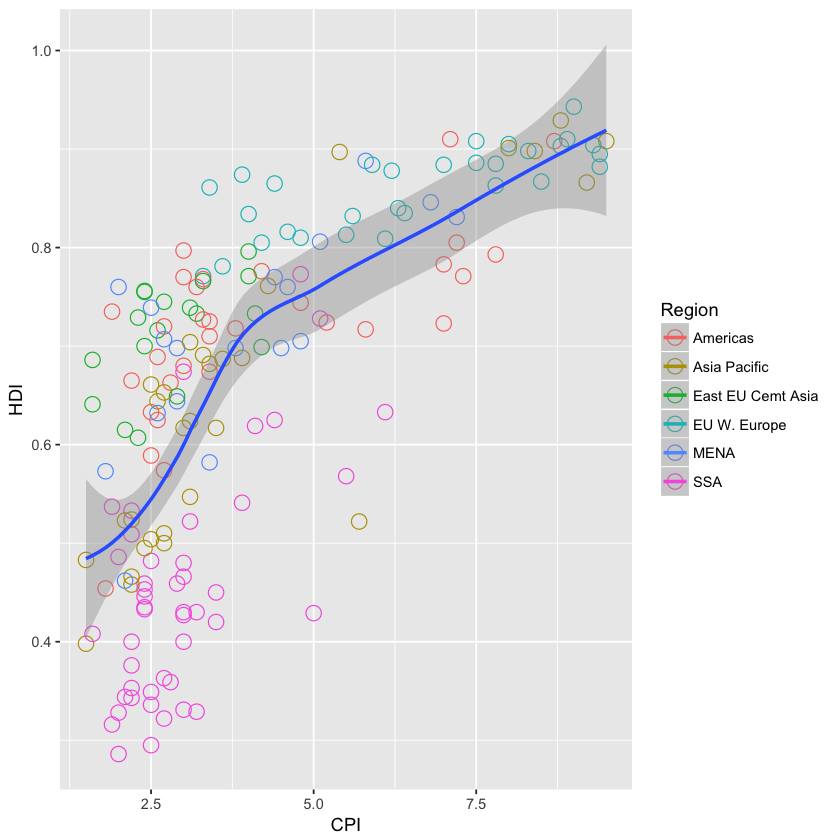

In [13]:
pl + geom_smooth(aes(group=1)) 

__We want to further edit this trend line. Add the following arguments to geom_smooth (outside of aes):__ <br>
* method = 'lm'
* formula = y ~ log(x)
* se = FALSE
* color = 'red' <br>

For more info on these arguments, check out the documentation under the Arguments list for details. <br>
Assign all of this to pl2

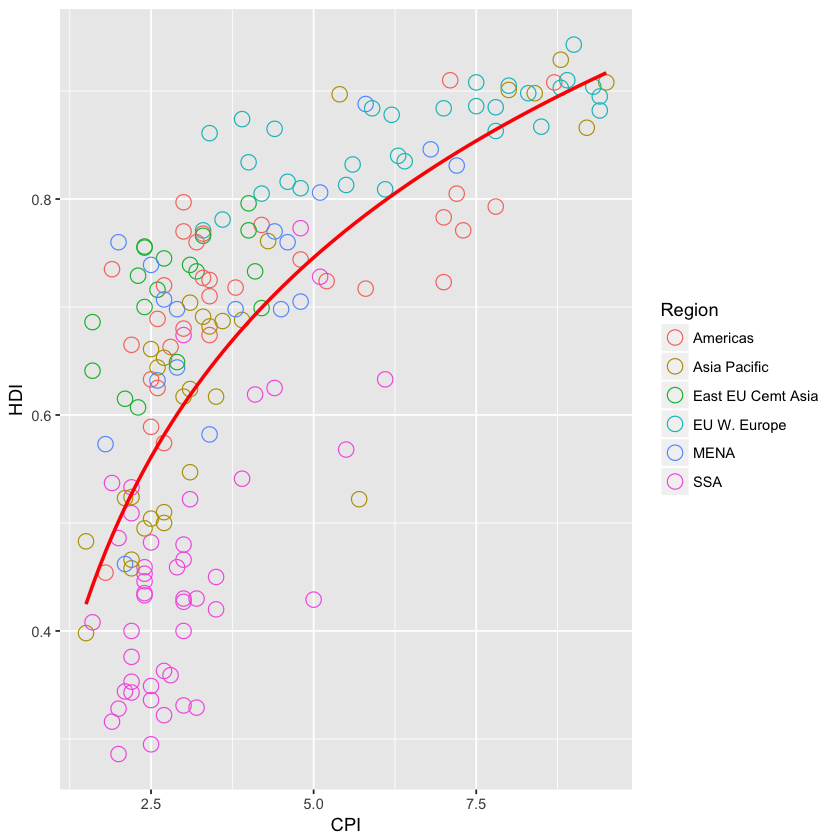

In [14]:
pl2 <- pl + geom_smooth(aes(group=1),method ='lm',formula = y~log(x),se=FALSE,color='red')
pl2

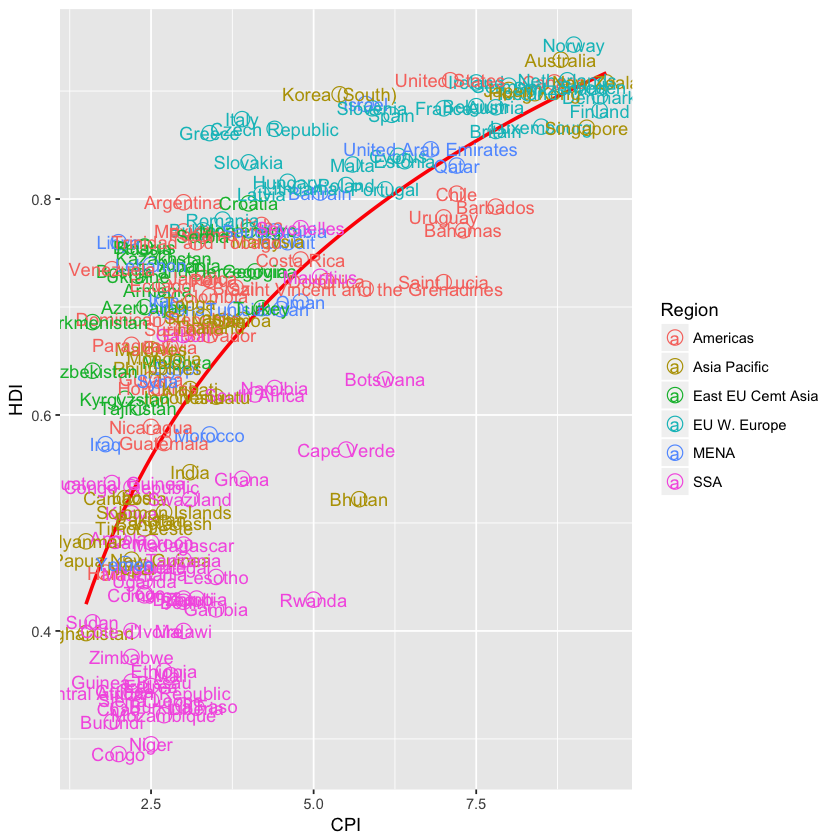

In [15]:
pl2 + geom_text(aes(label=Country))

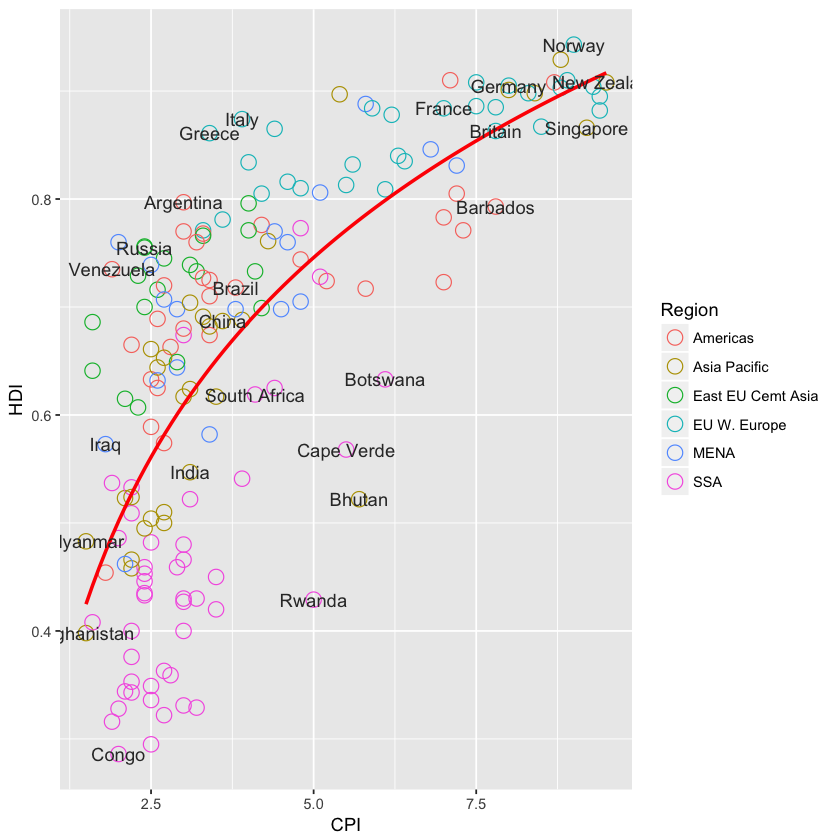

In [16]:
pointsToLabel <- c("Russia", "Venezuela", "Iraq", "Myanmar", "Sudan",
                   "Afghanistan", "Congo", "Greece", "Argentina", "Brazil",
                   "India", "Italy", "China", "South Africa", "Spane",
                   "Botswana", "Cape Verde", "Bhutan", "Rwanda", "France",
                   "United States", "Germany", "Britain", "Barbados", "Norway", "Japan",
                   "New Zealand", "Singapore")

pl3 <- pl2 + geom_text(aes(label = Country), color = "gray20", 
                data = subset(df, Country %in% pointsToLabel),check_overlap = TRUE)

pl3

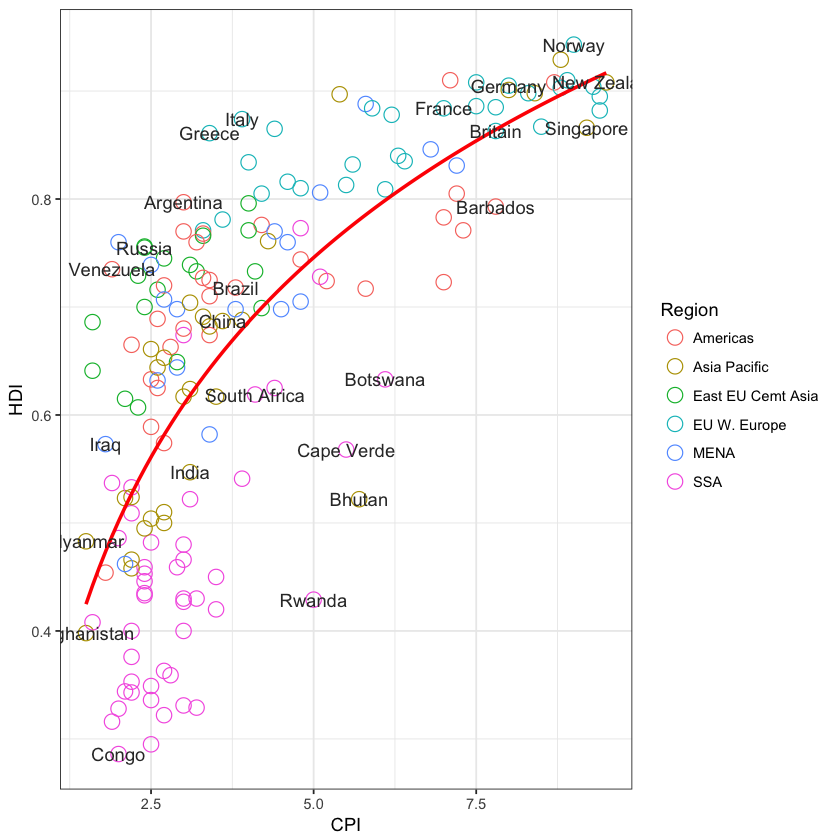

In [17]:
pl4 <- pl3 + theme_bw() 
pl4

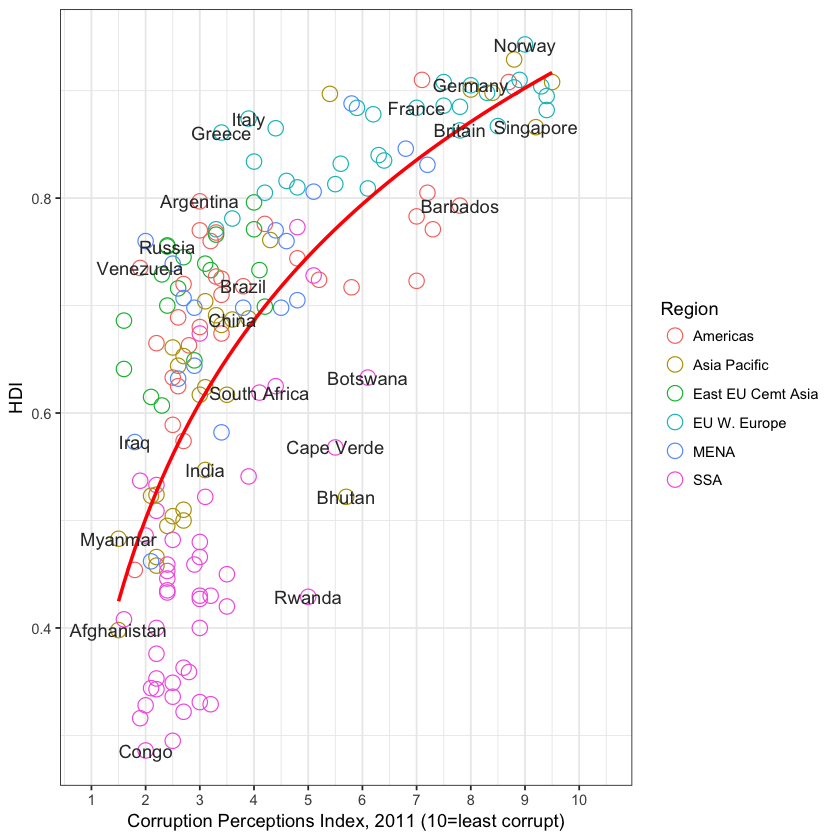

In [18]:
pl5 <- pl4 + scale_x_continuous(name = "Corruption Perceptions Index, 2011 (10=least corrupt)",
                     limits = c(.9, 10.5),breaks=1:10) 
pl5

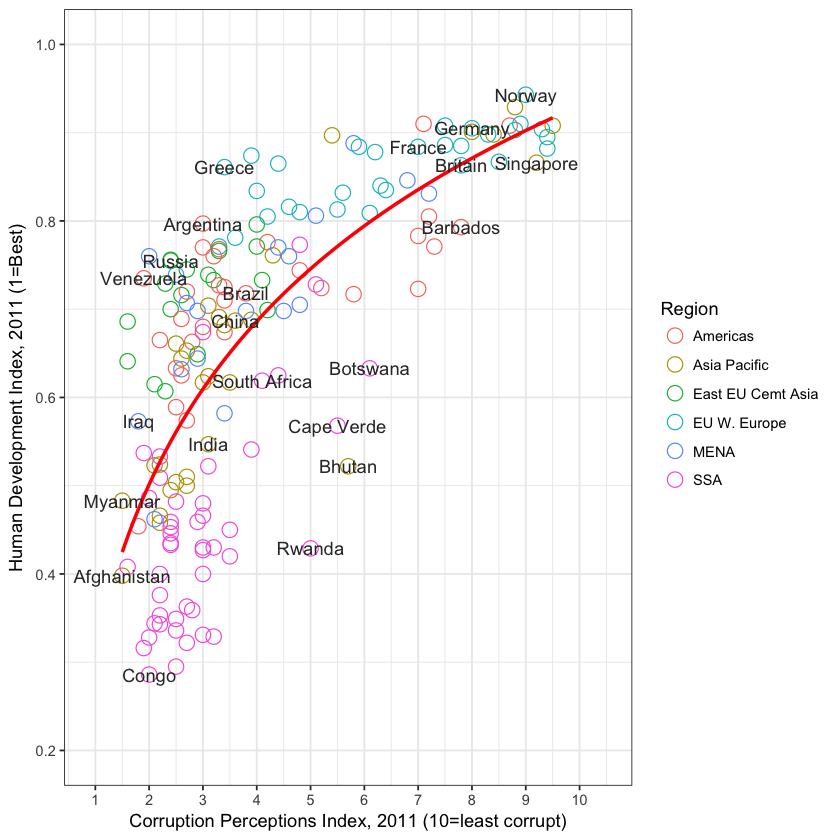

In [20]:
pl6 <- pl5 + scale_y_continuous(name = "Human Development Index, 2011 (1=Best)",
                     limits = c(0.2, 1.0))
pl6

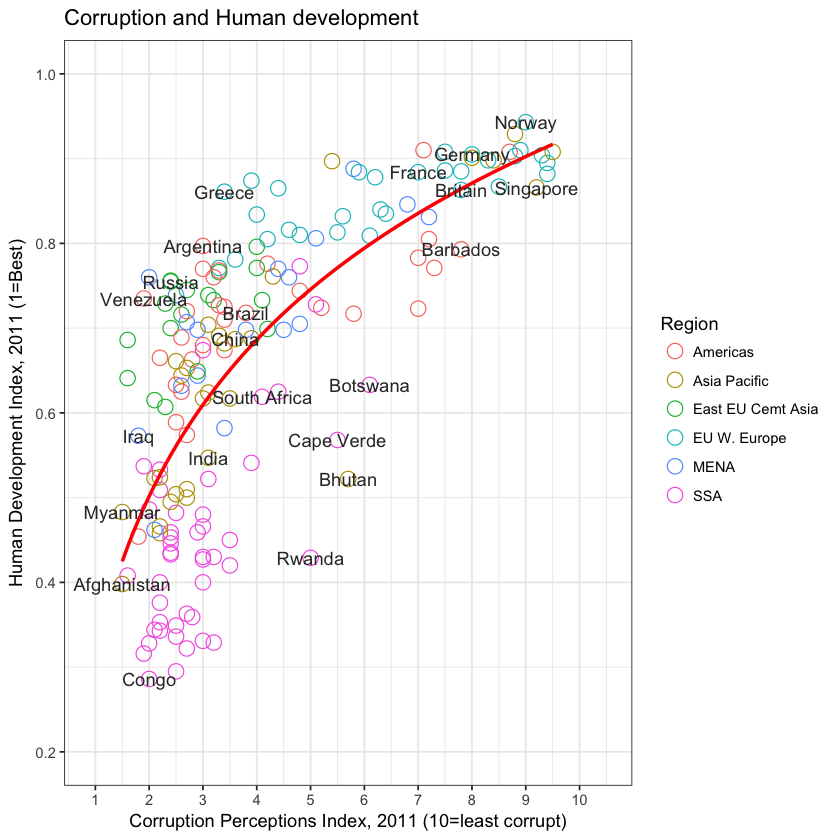

In [21]:
pl6 + ggtitle("Corruption and Human development")


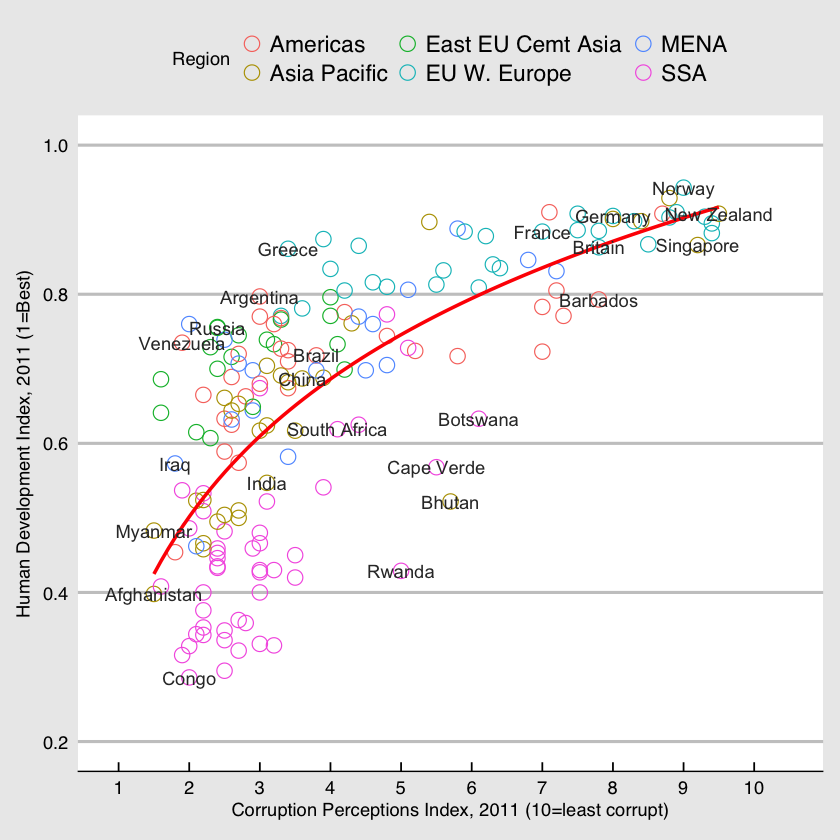

In [22]:
library(ggthemes)
pl6 + theme_economist_white()